<a href="https://colab.research.google.com/github/ReynaraEzra/Image-Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification On Rock Paper Scissors**
# **Reynara Ezra Pratama**

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
!pip install ipython-autotime
%load_ext autotime

time: 176 µs (started: 2021-06-19 15:29:33 +00:00)


## **Get Data**

In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-19 15:29:33--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  2.08MB/s    in 4m 36s  

2021-06-19 15:34:10 (1.12 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]

time: 4min 37s (started: 2021-06-19 15:29:33 +00:00)


## **Extract Data**

In [4]:
import zipfile, os

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

time: 5.1 s (started: 2021-06-19 15:34:10 +00:00)


## **Check Data**

In [5]:
print('Number of Rock Images :{}'.format(len(os.listdir('/tmp/rockpaperscissors/rock/'))))
print('Number of Paper Images :{}'.format(len(os.listdir('/tmp/rockpaperscissors/paper/'))))
print('Number of Scissors Images :{}'.format(len(os.listdir('/tmp/rockpaperscissors/scissors/'))))
print('Total Images : {}'.format(
    len(os.listdir('/tmp/rockpaperscissors/rock/')) + 
    len(os.listdir('/tmp/rockpaperscissors/paper/')) + 
    len(os.listdir('/tmp/rockpaperscissors/scissors/'))
    )
)

Number of Rock Images :726
Number of Paper Images :712
Number of Scissors Images :750
Total Images : 2188
time: 9.95 ms (started: 2021-06-19 15:34:15 +00:00)


## **Split Folder**

In [6]:
!pip install split_folders

time: 2.64 s (started: 2021-06-19 15:34:15 +00:00)


In [7]:
import splitfolders

splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', '/tmp/rockpaperscissors/data', seed=1, ratio=(0.6, 0.4))

Copying files: 2188 files [00:01, 1663.65 files/s]

time: 1.34 s (started: 2021-06-19 15:34:18 +00:00)


In [8]:
base_dir = '/tmp/rockpaperscissors/data'
train_dir = os.path.join(base_dir, 'train') ## Train Dataset
validation_dir = os.path.join(base_dir, 'val') ## Validation Dataset

time: 2 ms (started: 2021-06-19 15:34:19 +00:00)


In [9]:
os.listdir('/tmp/rockpaperscissors/data/train')

['rock', 'paper', 'scissors']

time: 6.46 ms (started: 2021-06-19 15:34:19 +00:00)


In [10]:
os.listdir('/tmp/rockpaperscissors/data/val')

['rock', 'paper', 'scissors']

time: 4.77 ms (started: 2021-06-19 15:34:19 +00:00)


In [11]:
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

time: 5.87 ms (started: 2021-06-19 15:34:19 +00:00)


## **Check Train and Validation Size**

**Train 60%**

In [12]:
total_size_train = (
    len(os.listdir('/tmp/rockpaperscissors/data/train/rock')) + 
    len(os.listdir('/tmp/rockpaperscissors/data/train/paper')) +
    len(os.listdir('/tmp/rockpaperscissors/data/train/scissors'))
)
print('Total Training Data is : {}'.format(total_size_train))

Total Training Data is : 1312
time: 6.86 ms (started: 2021-06-19 15:34:19 +00:00)


**Validation 40%**

In [13]:
total_size_validation = (
    len(os.listdir('/tmp/rockpaperscissors/data/val/rock')) +
    len(os.listdir('/tmp/rockpaperscissors/data/val/paper')) +
    len(os.listdir('/tmp/rockpaperscissors/data/val/scissors'))
)
print('Total Valdation Data is : {}'.format(total_size_validation))

Total Valdation Data is : 876
time: 7.97 ms (started: 2021-06-19 15:34:19 +00:00)


## **Image Augmentation**

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 128,
    class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 128,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.
time: 217 ms (started: 2021-06-19 15:34:19 +00:00)


## **Construct Model Sequential Using CNN**

In [15]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

time: 162 ms (started: 2021-06-19 15:34:20 +00:00)


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

## **Run Model**

In [17]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']
)

time: 22.3 ms (started: 2021-06-19 15:34:20 +00:00)


In [18]:
history = model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator,
    verbose = 1
)

Epoch 1/10
11/11 [==============================] - 74s 7s/step - loss: 1.1411 - accuracy: 0.3277 - val_loss: 1.0824 - val_accuracy: 0.4863
Epoch 2/10
11/11 [==============================] - 72s 7s/step - loss: 1.0111 - accuracy: 0.5244 - val_loss: 0.8853 - val_accuracy: 0.5388
Epoch 3/10
11/11 [==============================] - 72s 7s/step - loss: 0.8172 - accuracy: 0.6532 - val_loss: 0.7071 - val_accuracy: 0.7089
Epoch 4/10
11/11 [==============================] - 72s 7s/step - loss: 0.5764 - accuracy: 0.7873 - val_loss: 0.4036 - val_accuracy: 0.8721
Epoch 5/10
11/11 [==============================] - 72s 7s/step - loss: 0.3576 - accuracy: 0.8735 - val_loss: 0.3059 - val_accuracy: 0.8916
Epoch 6/10
11/11 [==============================] - 72s 7s/step - loss: 0.3444 - accuracy: 0.8735 - val_loss: 0.3332 - val_accuracy: 0.8756
Epoch 7/10
11/11 [==============================] - 72s 7s/step - loss: 0.3407 - accuracy: 0.8704 - val_loss: 0.2588 - val_accuracy: 0.9155
Epoch 8/10
11/11 [==

## **Plot Model History**

In [19]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
  plt.figure(figsize=(18,5))
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plot_acc = plt.plot(epochs, acc, 'red', label='Training Accuracy')
  plot_val_acc = plt.plot(epochs, val_acc, 'blue', label='Validation Accuracy')
  plt.xlabel('Epoch', fontsize=15)
  plt.ylabel('Accuracy', fontsize=15)
  plt.title('Training and Validation Accuracy', fontsize=25)
  plt.legend(bbox_to_anchor=(1,1), loc='best')
  plt.grid()
  plt.show()

def plot_loss(history):
  plt.figure(figsize=(18,5))
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  plot_loss = plt.plot(epochs, loss, 'red', label='Training Loss')
  plot_val_loss = plt.plot(epochs, val_loss, 'blue', label='Validation Loss')
  plt.xlabel('Epoch', fontsize=15)
  plt.ylabel('Loss', fontsize=15)
  plt.title('Training and Validation Loss', fontsize=25)
  plt.legend(bbox_to_anchor=(1,1), loc='best')
  plt.grid()
  plt.show()

time: 23.2 ms (started: 2021-06-19 15:46:52 +00:00)


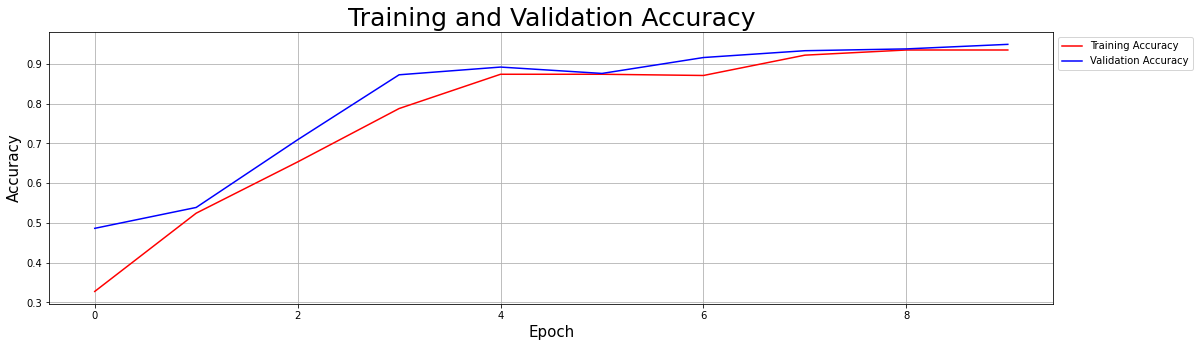

time: 209 ms (started: 2021-06-19 15:46:52 +00:00)


In [20]:
plot_accuracy(history)

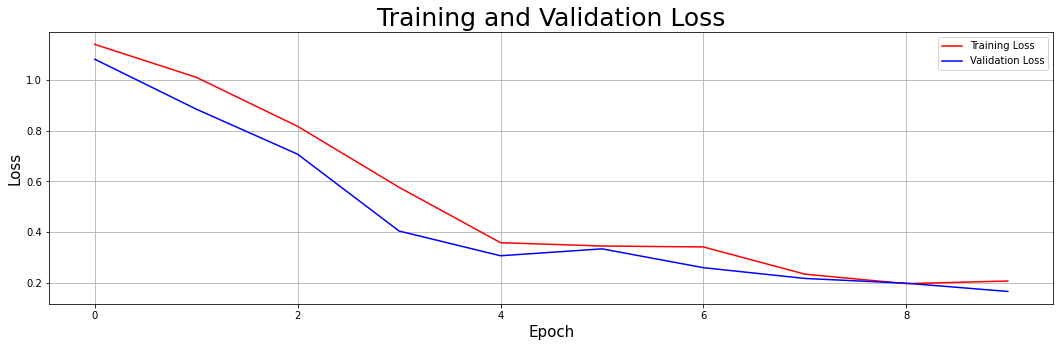

time: 189 ms (started: 2021-06-19 15:46:52 +00:00)


In [21]:
plot_loss(history)

## **Predict Image**

Saving paper.jpg to paper (3).jpg
paper.jpg
Paper


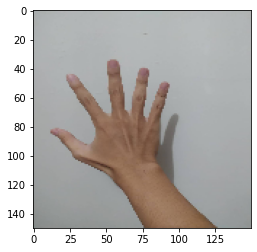

time: 6.11 s (started: 2021-06-19 15:55:42 +00:00)


In [25]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0] != 0:
    print('Paper')
  elif classes[0,1] != 1:
    print('Rock')
  else:
    print('Scissors')
